In [1]:
%env PYART_QUIET=true

env: PYART_QUIET=true


In [2]:
import pathlib

import cartopy
import matplotlib.pyplot as plt
import numpy
import pyart

In [3]:
MAP_PROJECTION = cartopy.crs.PlateCarree()

/Users/ducth/.pyenv/versions/3.11.7/envs/MF-Airflow/lib/python3.11/site-packages/pyart/io/sigmet.py:146: UserWarning: Unknown type: 17, returning raw data
  sigmet_data, sigmet_metadata = sigmetfile.read_data(full_xhdr=full_xhdr)


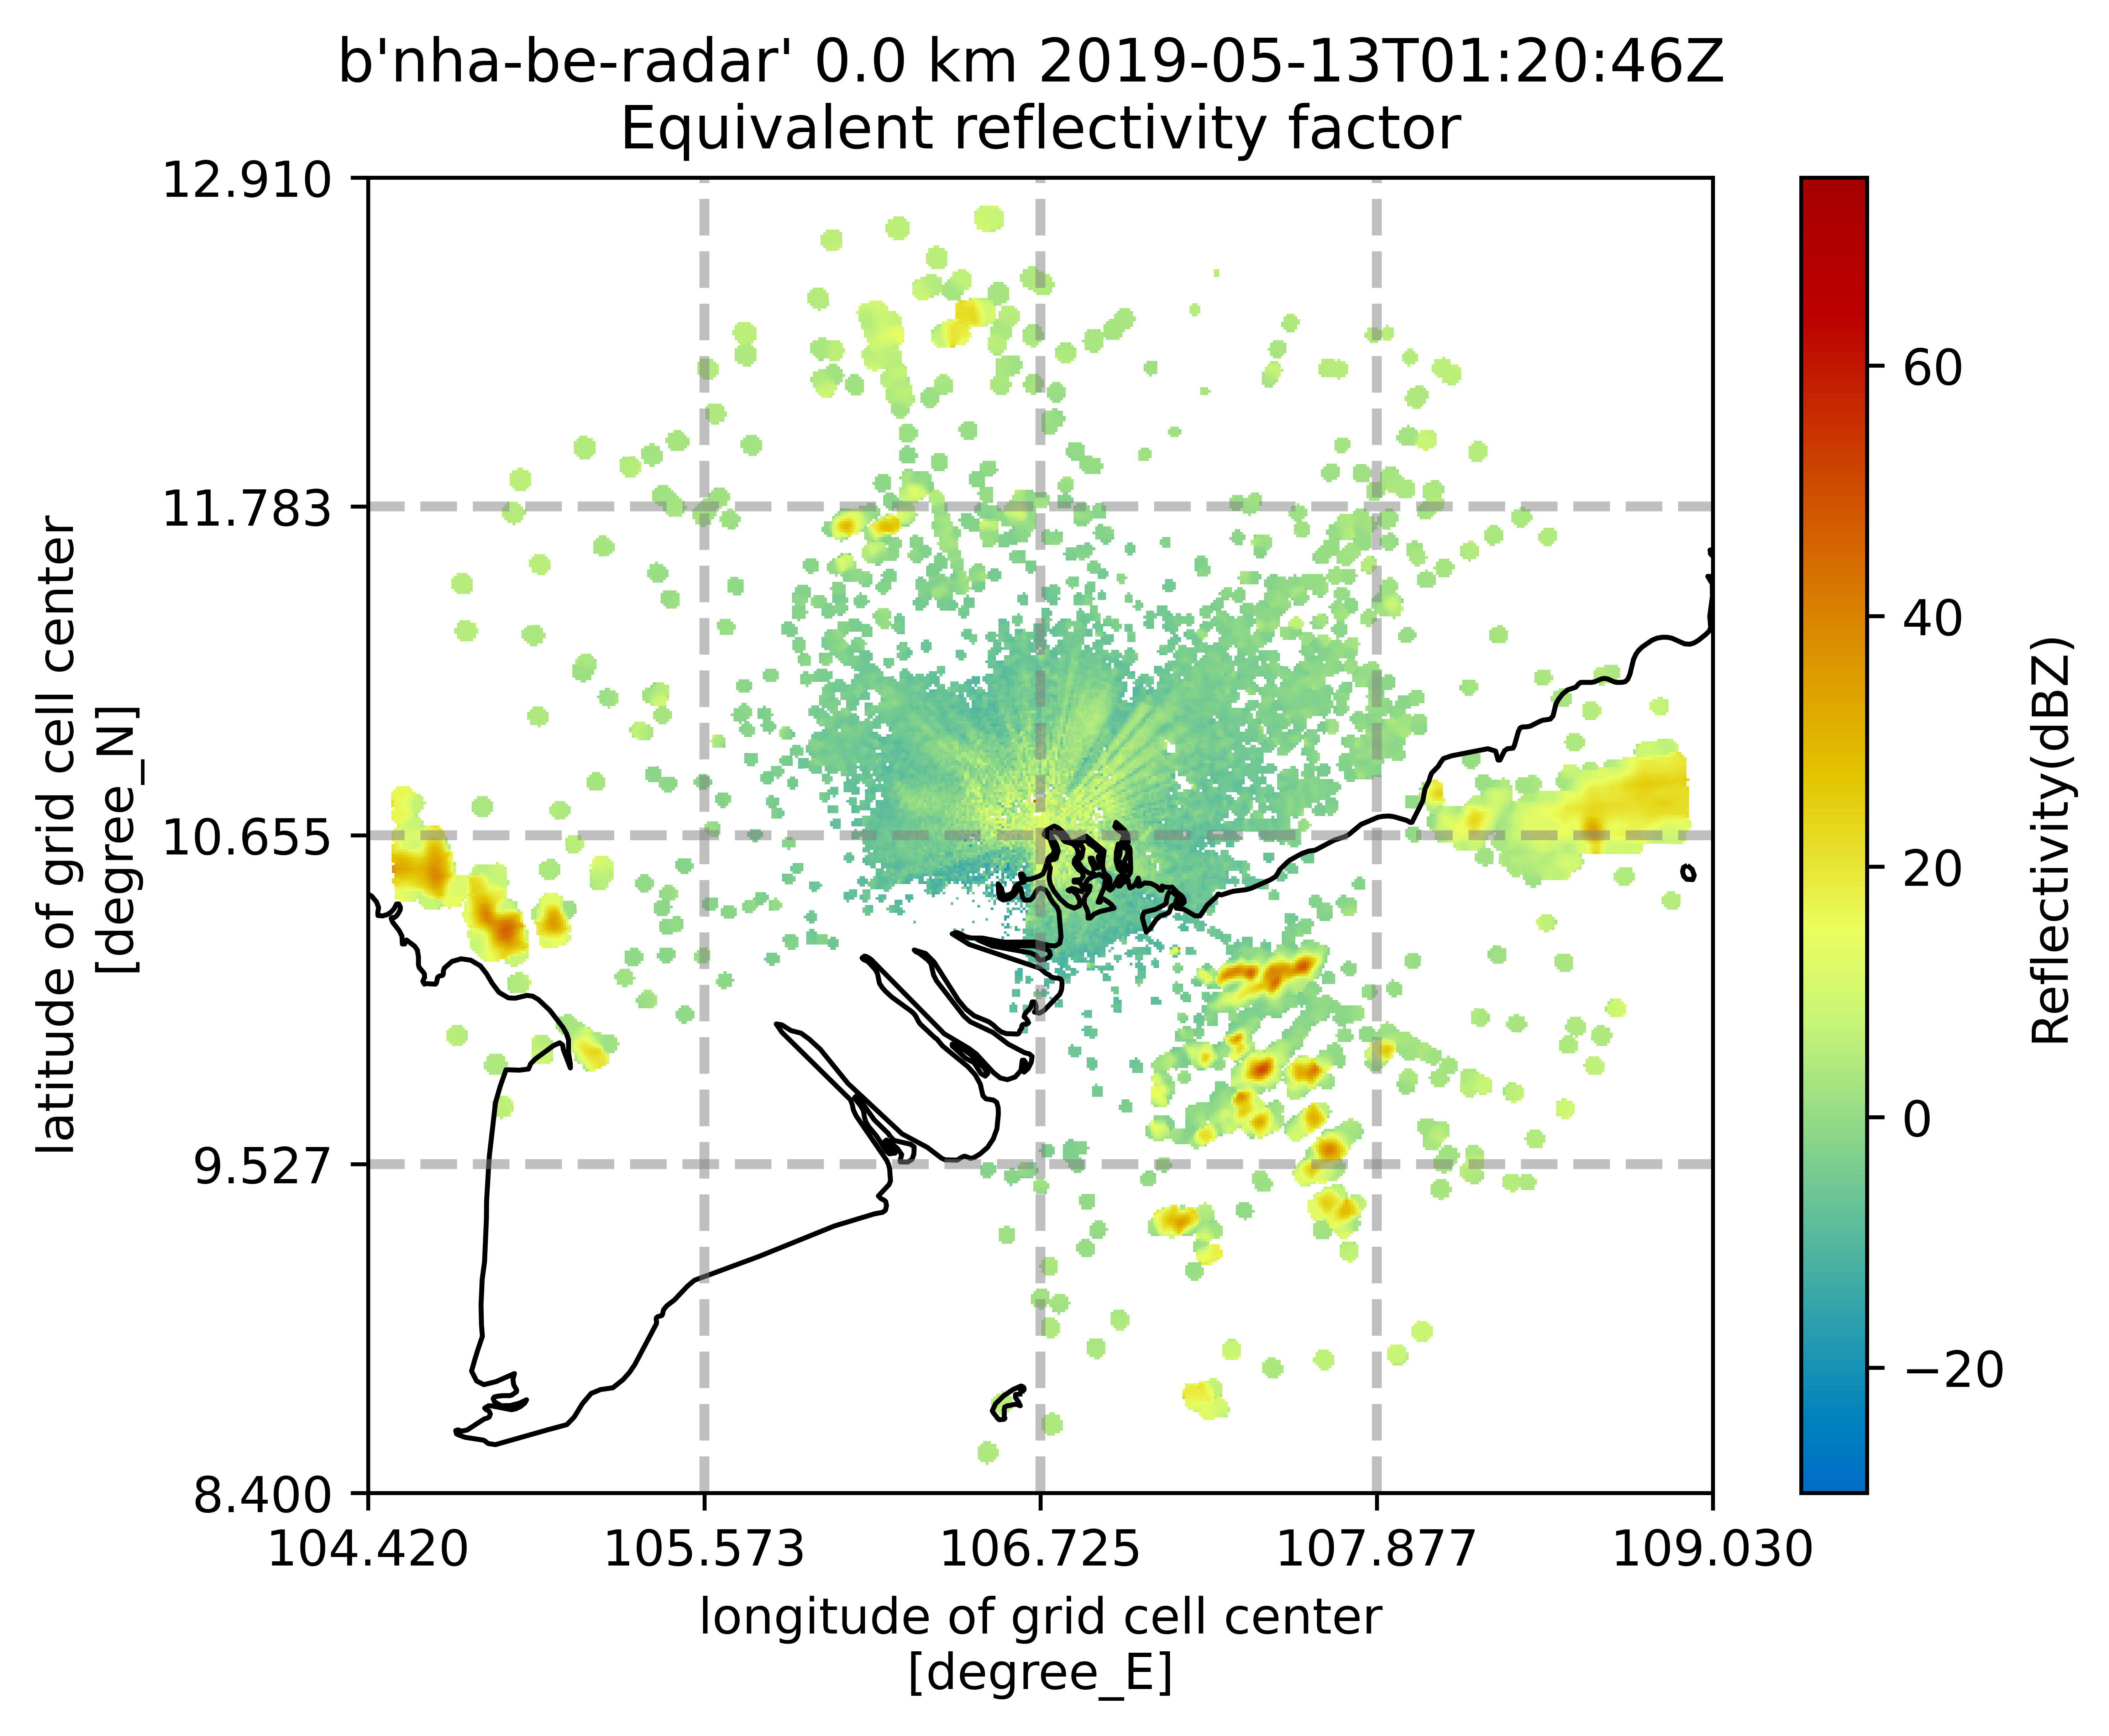

In [12]:
from matplotlib.axes import Axes
from matplotlib.figure import Figure

sigmet_file_path = pathlib.Path(
    "/Users/ducth/PycharmProjects/MeteorFlow/MF-Airflow/data/UF/NHB190513012007.RAW23DN"
)
captured_data: pyart.core.Radar = pyart.io.read_sigmet(sigmet_file_path)


processed_grid = pyart.map.grid_from_radars(
    captured_data,
    grid_shape=(10, 500, 500),
    grid_limits=((0, 100), (-250_000, 250_000), (-250_000, 250_000)),
)


fig: Figure
ax: Axes
fig = plt.figure(dpi=1000)

ax = plt.axes(projection=MAP_PROJECTION)

ax.add_feature(
    cartopy.feature.NaturalEarthFeature(
        category="physical", name="coastline", scale="10m", facecolor="none"
    ),
    linestyle="-",
    edgecolor="k",
    linewidth=1,
)

grid_display = pyart.graph.GridMapDisplay(processed_grid)
grid_display.plot_grid(
    field="reflectivity",
    level=3,
    cmap="pyart_HomeyerRainbow",
    fig=fig,
    ax=ax,
    projection=MAP_PROJECTION,
    embellish=False,
    lon_lines=numpy.linspace(
        numpy.round(processed_grid.to_xarray().lon.min(), 2),
        numpy.round(processed_grid.to_xarray().lon.max(), 2),
        5,
    ),
    lat_lines=numpy.linspace(
        numpy.round(processed_grid.to_xarray().lat.min(), 2),
        numpy.round(processed_grid.to_xarray().lat.max(), 2),
        5,
    ),
)

In [5]:
type(processed_grid.to_xarray()['reflectivity'])

xarray.core.dataarray.DataArray

In [6]:
captured_data.fields['corrected_velocity']['data'].shape

KeyError: 'corrected_velocity'

In [ ]:
processed_grid.to_xarray()['reflectivity']

<xarray.DataArray 'reflectivity' (time: 1, z: 10, y: 1000, x: 1000)>
array([[[[       nan,        nan,        nan, ..., -4.47419  ,
          -4.555895 , -4.775757 ],
         [       nan,        nan,        nan, ..., -4.612299 ,
          -4.714543 , -4.8205066],
         [       nan,        nan,        nan, ..., -4.6831527,
          -4.7988615, -4.9152565],
         ...,
         [ 3.8098247,  4.080802 ,  4.210545 , ...,  6.162558 ,
           5.855328 ,  5.7192845],
         [ 3.650872 ,  3.9938576,  4.1727533, ...,  6.103809 ,
           5.9840097,  5.8234878],
         [ 3.5342019,  3.824709 ,  4.077305 , ...,  6.035222 ,
           5.871594 ,  5.748189 ]],

        [[       nan,        nan,        nan, ..., -4.4689403,
          -4.565703 , -4.7754464],
         [       nan,        nan,        nan, ..., -4.6119957,
          -4.7142034, -4.8201413],
         [       nan,        nan,        nan, ..., -4.682793 ,
          -4.798454 , -4.9048905],
...
         [ 3.7790465,  3.923954 ,  4.0528436, ...,  5.414787 ,
           5.2430077,  5.2048965],
         [ 3.619608 ,  3.8178053,  4.0172863, ...,  5.3804617,
           5.2130446,  5.1404123],
         [ 3.416134 ,  3.6632366,  3.9728782, ...,  5.33745  ,
           5.2920747,  4.9579496]],

        [[       nan,        nan,        nan, ..., -4.6295967,
          -4.730264 , -4.8278923],
         [       nan,        nan,        nan, ..., -4.678091 ,
          -4.7771435, -4.879782 ],
         [       nan,        nan,        nan, ..., -4.7473865,
          -4.859978 , -4.9624715],
         ...,
         [ 3.7741935,  3.8662379,  4.045528 , ...,  5.3654747,
           5.1925793,  5.157727 ],
         [ 3.6146333,  3.812969 ,  4.012622 , ...,  5.332011 ,
           5.1647334,  5.0946126],
         [ 3.4111576,  3.6583643,  3.905432 , ...,  5.2912397,
           5.0075846,  4.908852 ]]]], dtype=float32)
Coordinates:
  * time     (time) object 2019-05-13 01:20:46
  * z        (z) float64 0.0 11.11 22.22 33.33 44.44 ... 66.67 77.78 88.89 100.0
    lat      (y, x) float64 10.39 10.39 10.39 10.39 ... 10.93 10.93 10.93 10.93
    lon      (y, x) float64 106.5 106.5 106.5 106.5 ... 107.0 107.0 107.0 107.0
  * y        (y) float64 -3e+04 -2.994e+04 -2.988e+04 ... 2.994e+04 3e+04
  * x        (x) float64 -3e+04 -2.994e+04 -2.988e+04 ... 2.994e+04 3e+04
Attributes:
    units:          dBZ
    standard_name:  equivalent_reflectivity_factor
    long_name:      Reflectivity
    coordinates:    elevation azimuth range
    _FillValue:     -9999.0

In [ ]:
processed_grid.fields["reflectivity"]["data"].shape

(1, 200, 200)

In [ ]:
cartopy.feature.NaturalEarthFeature(
    category="physical", name="coastline", scale="10m", crs=cartopy.crs.Mercator()
).crs()

TypeError: Feature.__init__() got multiple values for argument 'crs'

## Export multiples


/Users/ducth/.pyenv/versions/3.11.7/envs/MF-Airflow/lib/python3.11/site-packages/pyart/io/sigmet.py:146: UserWarning: Unknown type: 17, returning raw data
  sigmet_data, sigmet_metadata = sigmetfile.read_data(full_xhdr=full_xhdr)
/Users/ducth/.pyenv/versions/3.11.7/envs/MF-Airflow/lib/python3.11/site-packages/pyart/io/sigmet.py:146: UserWarning: Unknown type: 17, returning raw data
  sigmet_data, sigmet_metadata = sigmetfile.read_data(full_xhdr=full_xhdr)
/Users/ducth/.pyenv/versions/3.11.7/envs/MF-Airflow/lib/python3.11/site-packages/pyart/io/sigmet.py:146: UserWarning: Unknown type: 17, returning raw data
  sigmet_data, sigmet_metadata = sigmetfile.read_data(full_xhdr=full_xhdr)
/Users/ducth/.pyenv/versions/3.11.7/envs/MF-Airflow/lib/python3.11/site-packages/pyart/io/sigmet.py:146: UserWarning: Unknown type: 17, returning raw data
  sigmet_data, sigmet_metadata = sigmetfile.read_data(full_xhdr=full_xhdr)
/Users/ducth/.pyenv/versions/3.11.7/envs/MF-Airflow/lib/python3.11/site-packages

KeyboardInterrupt: 

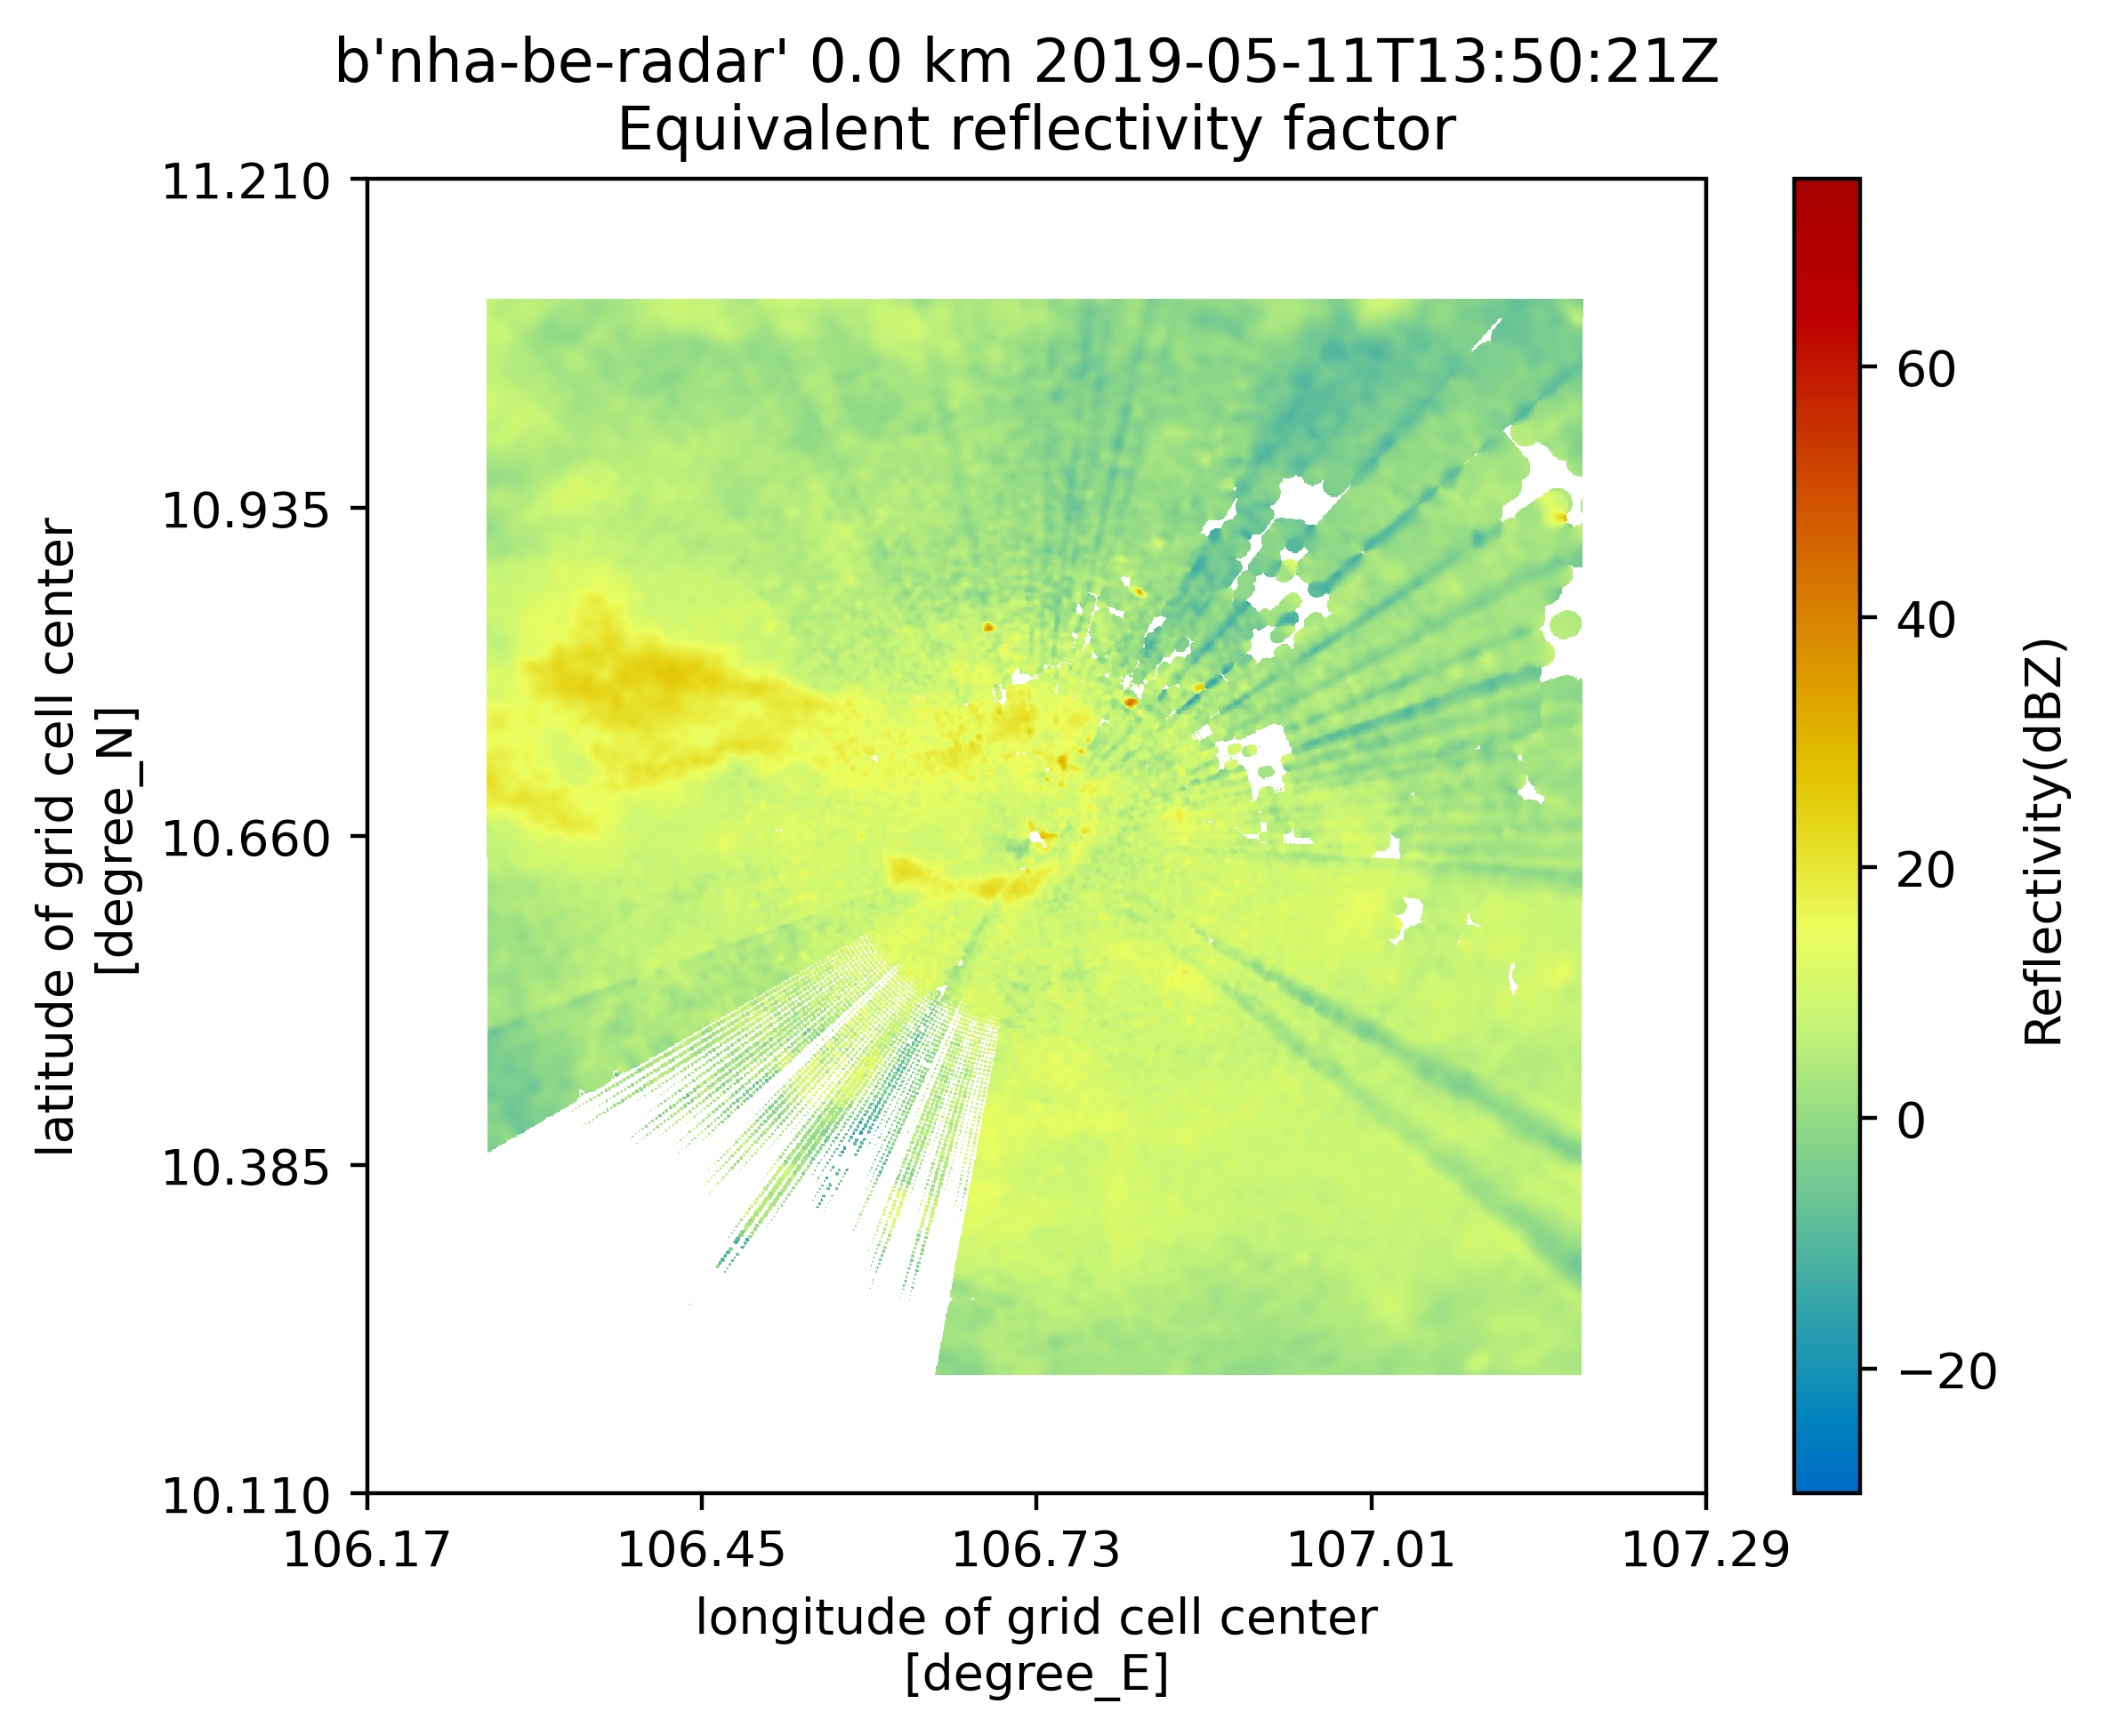

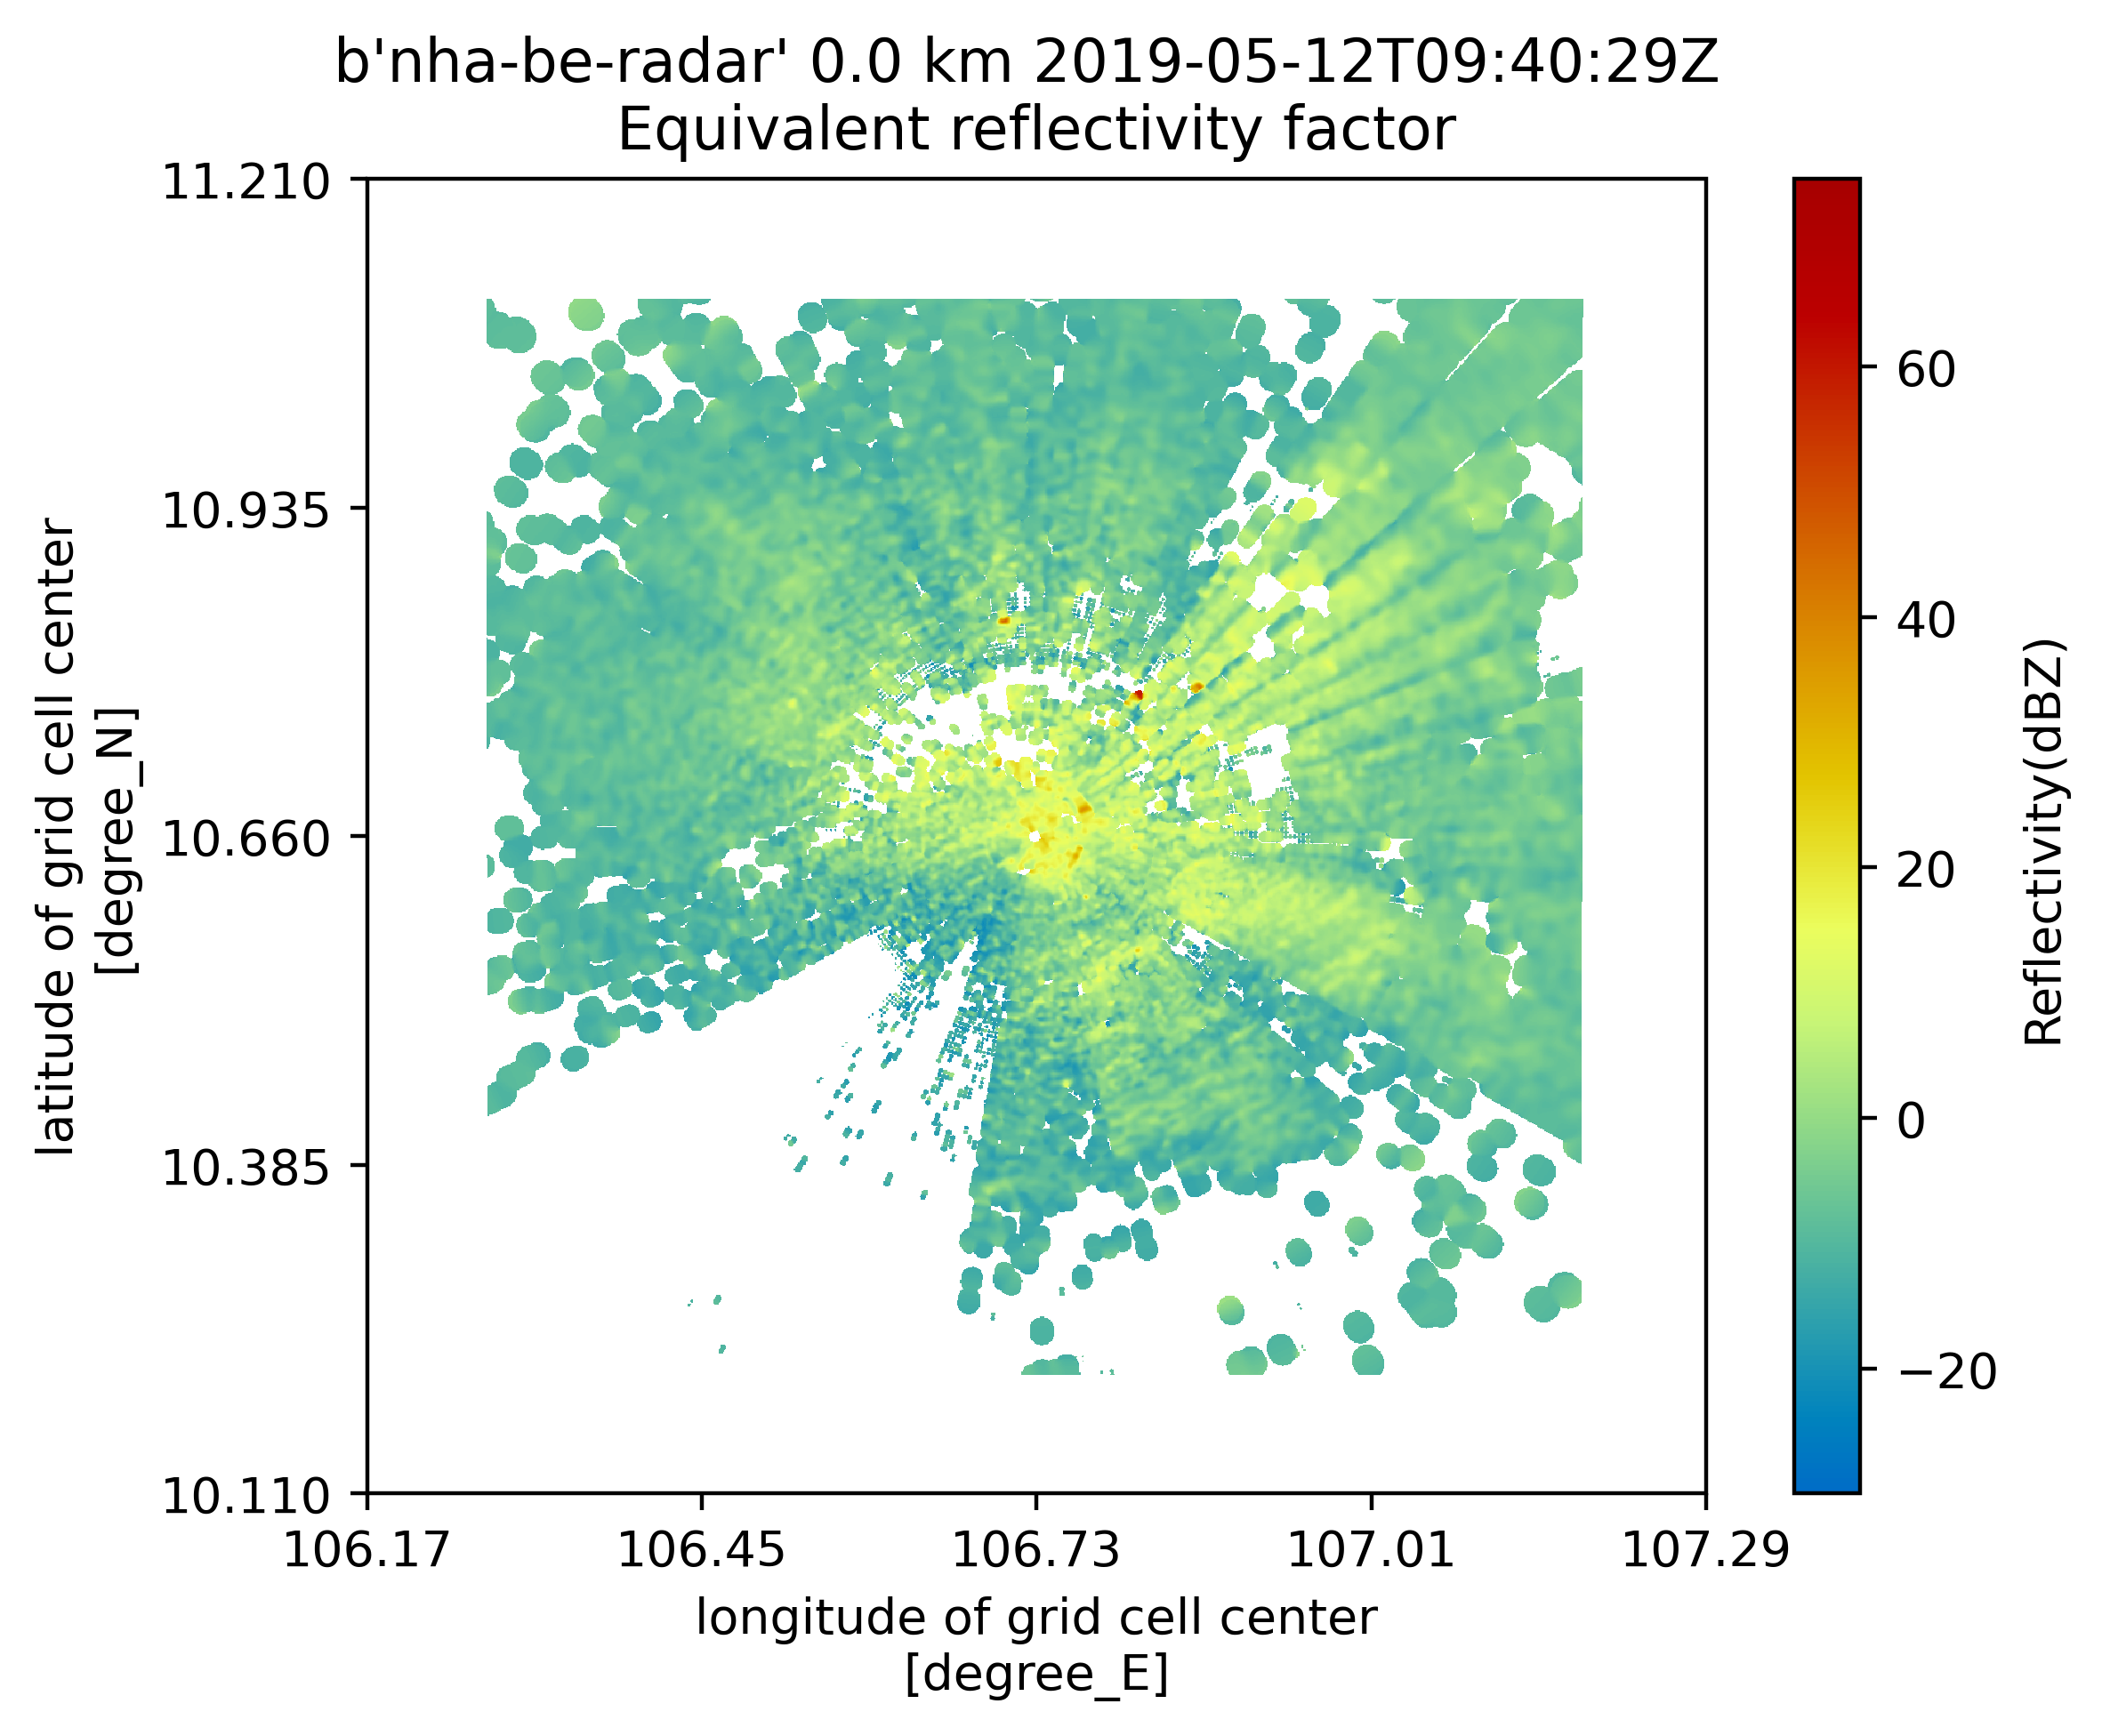

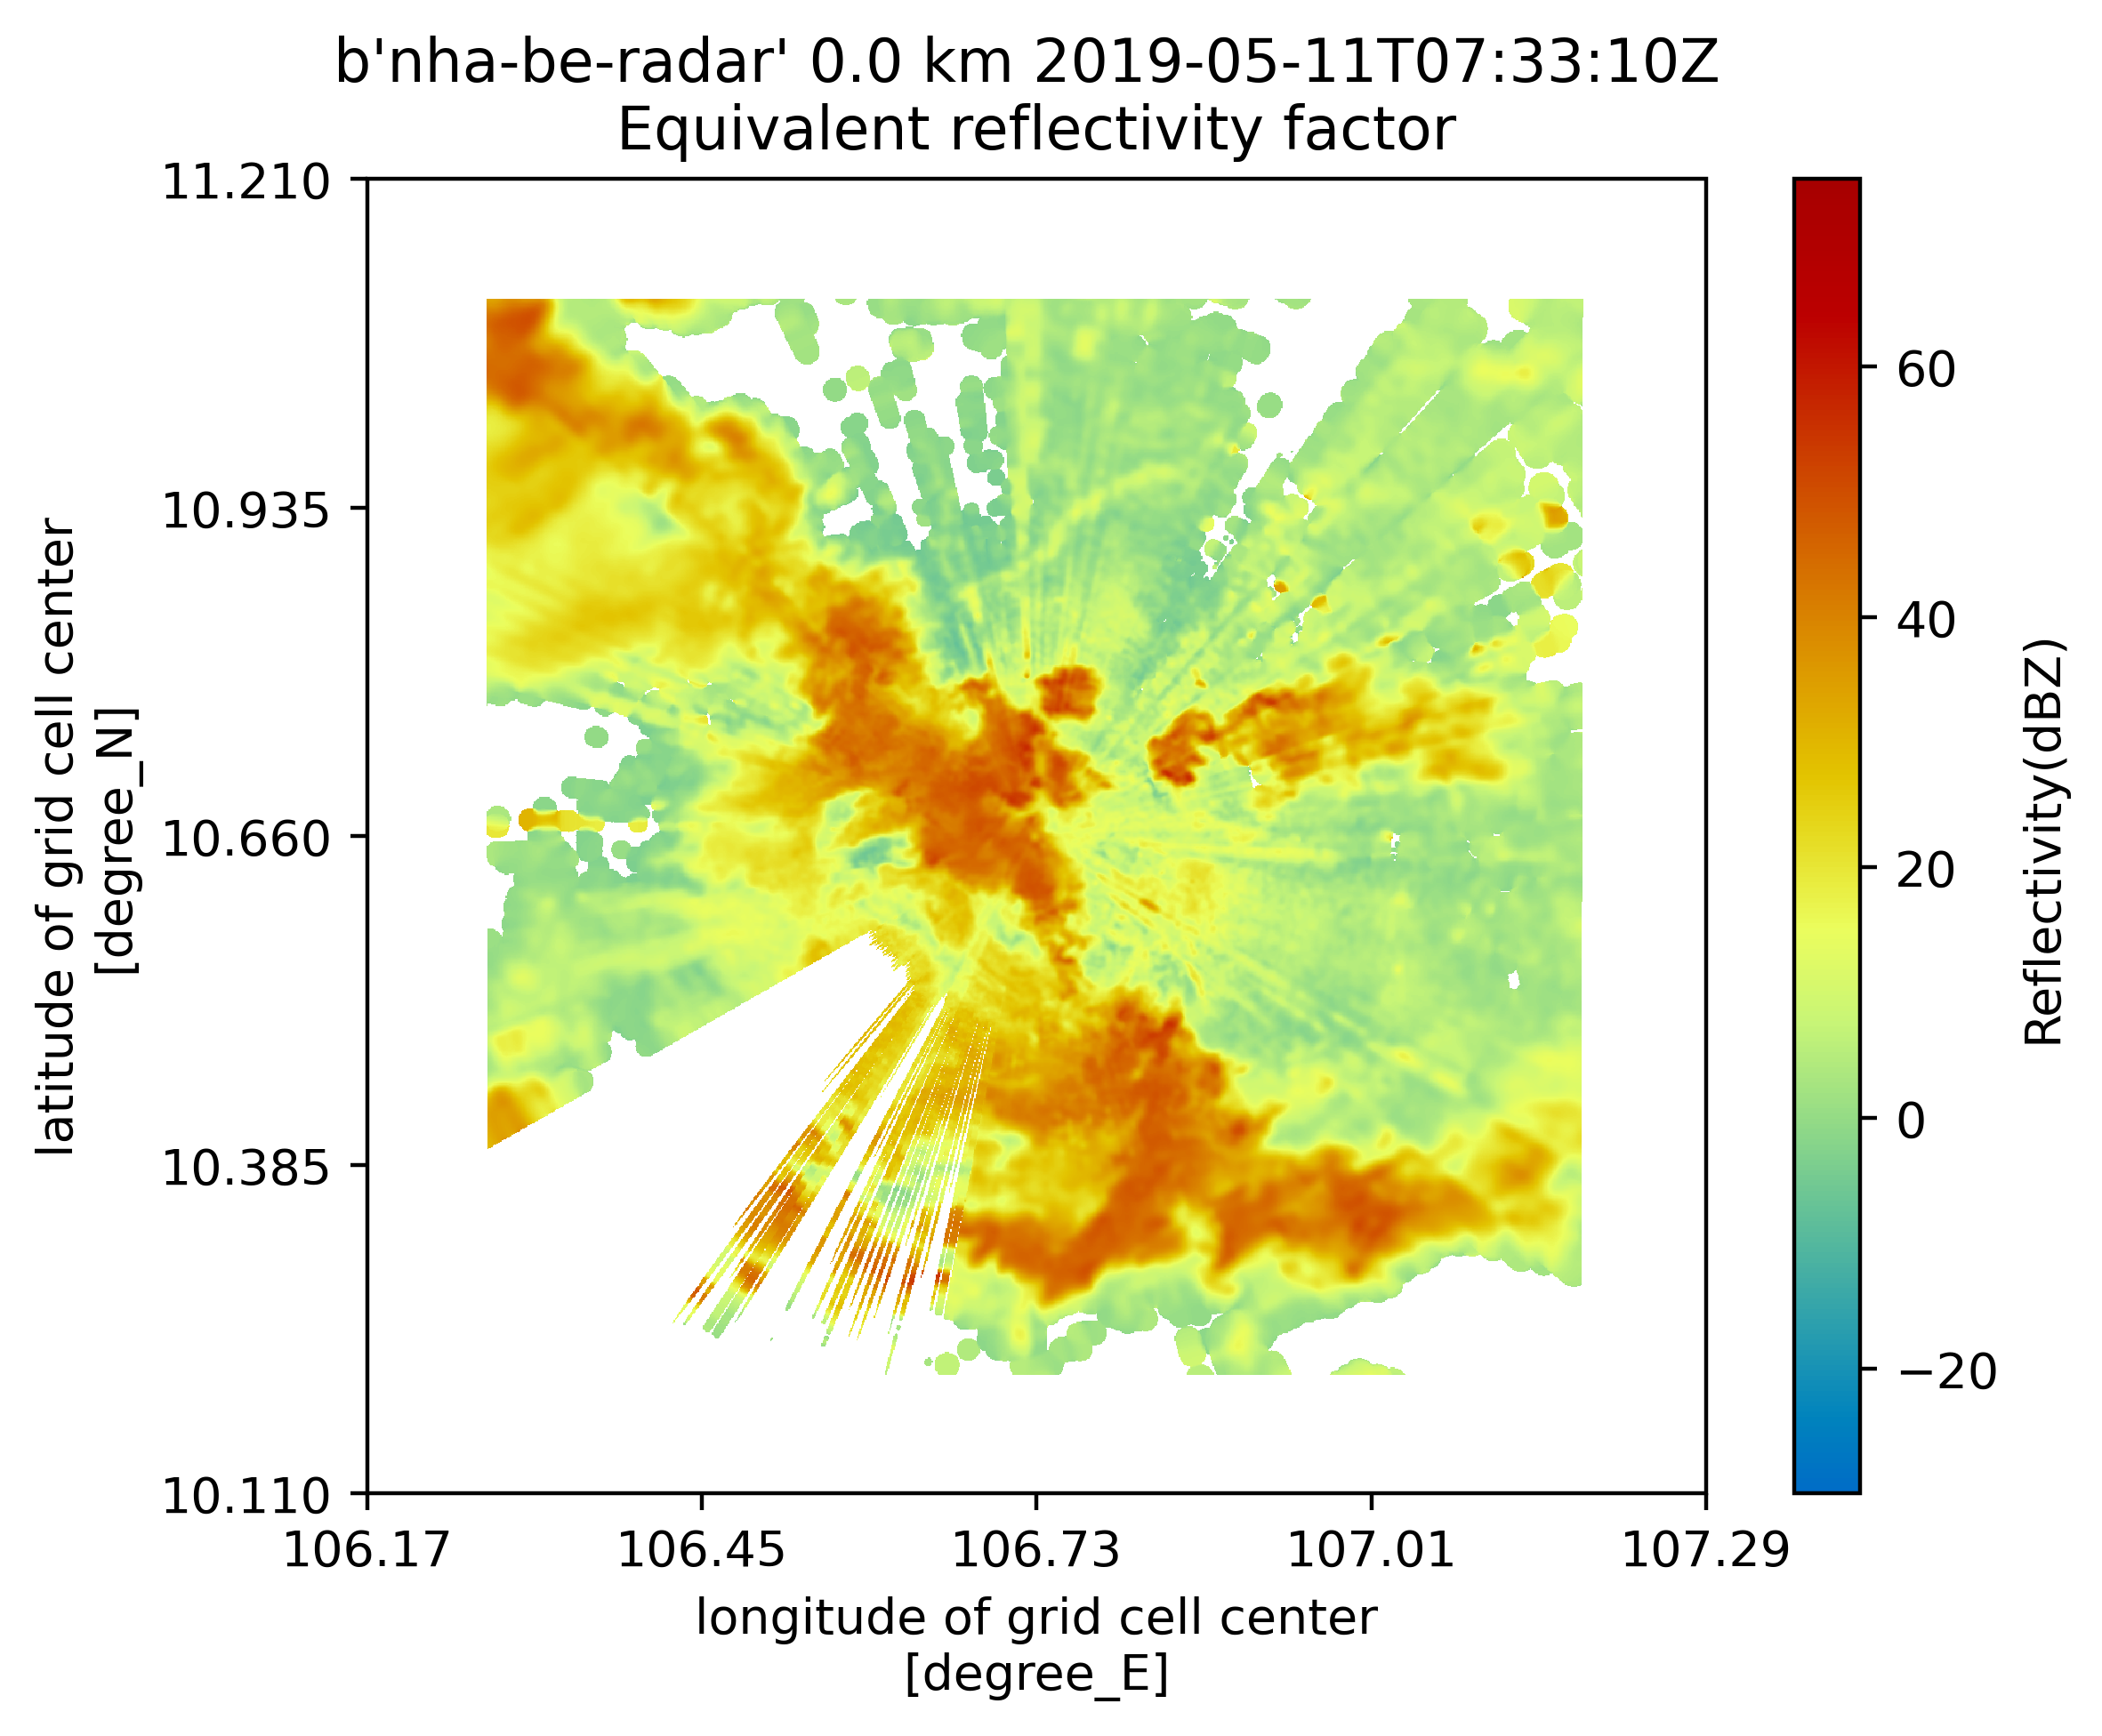

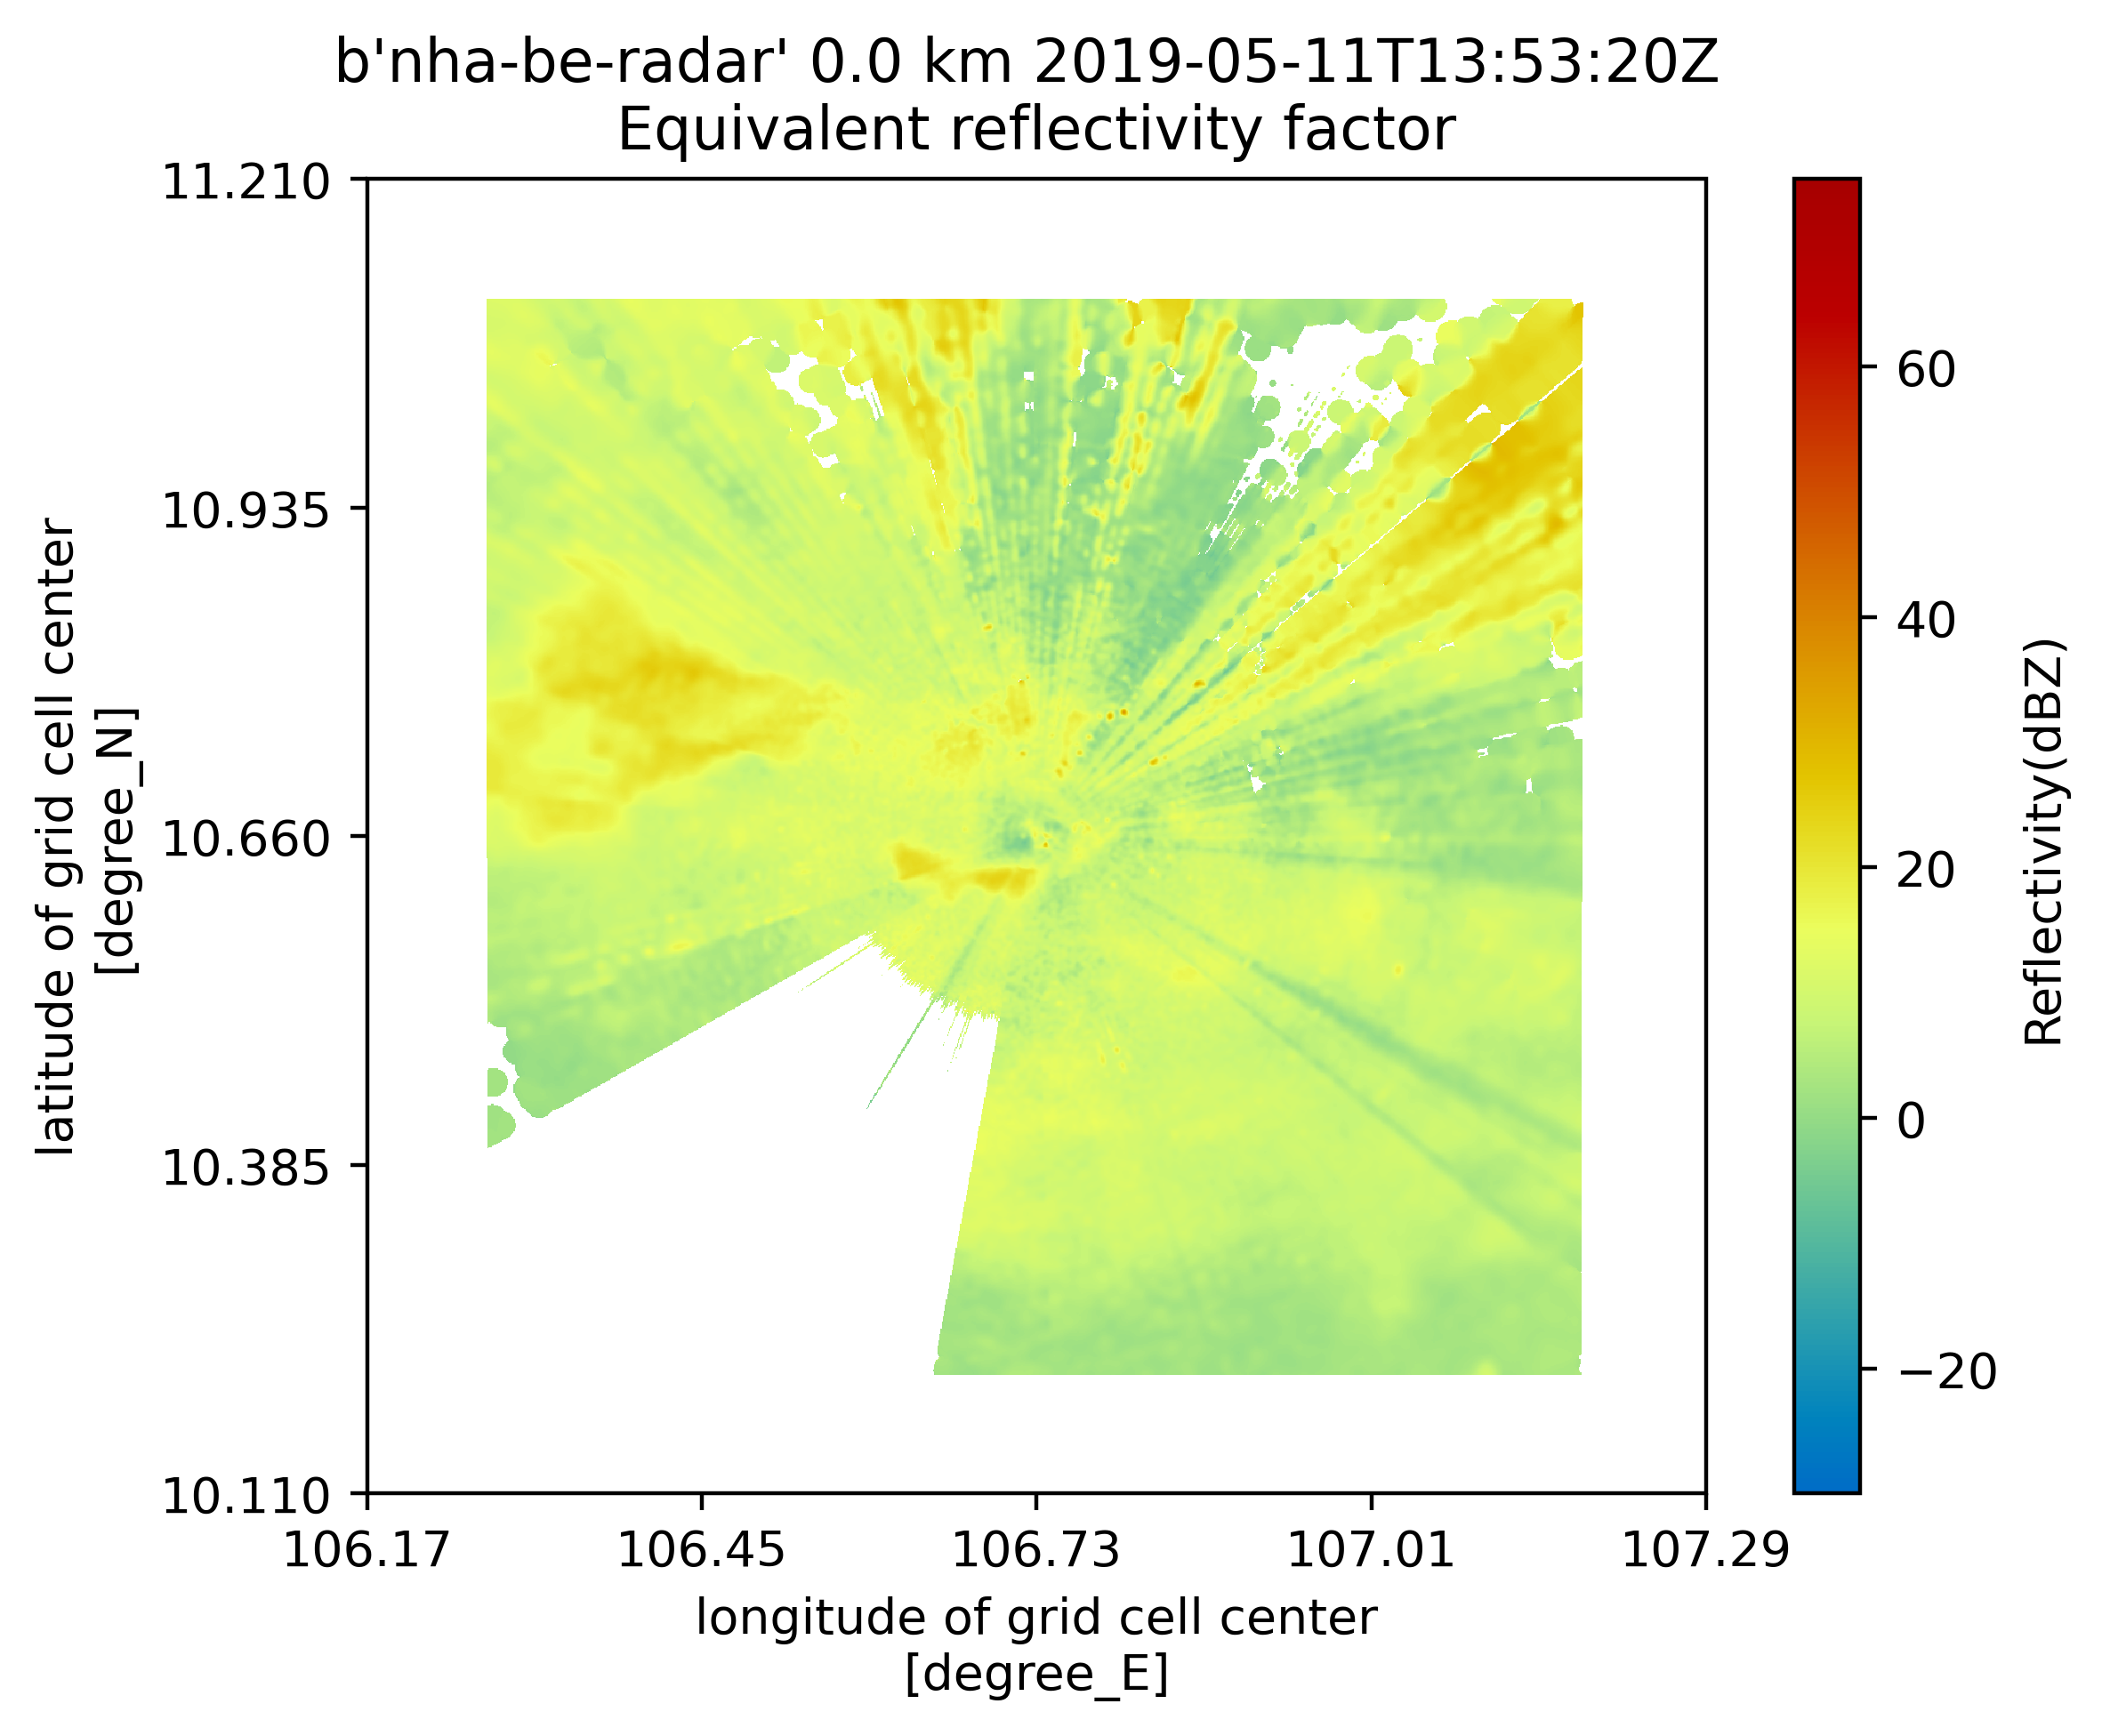

In [ ]:
sigmet_dir = pathlib.Path("/Users/ducth/PycharmProjects/MeteorFlow/MF-Airflow/data/UF")
sigmet_glob = sigmet_dir.glob("*.RAW*")

image_output_dir = pathlib.Path("/Users/ducth/PycharmProjects/MeteorFlow/MF-Airflow/data/img")

for sigmet_file_path in sigmet_glob:
    captured_data: pyart.core.Radar = pyart.io.read_sigmet(sigmet_file_path)

    processed_grid = pyart.map.grid_from_radars(
        captured_data,
        grid_shape=(1, 100, 100),
        grid_limits=((0, 100), (-50_000, 50_000), (-50_000, 50_000)),
    )

    fig = plt.figure(dpi=400)

    grid_display = pyart.graph.GridMapDisplay(processed_grid)
    grid_display.plot_grid(
        "reflectivity", cmap="pyart_HomeyerRainbow", fig=fig, projection=MAP_PROJECTION
    )

    image_new_name = sigmet_file_path.name + ".jpg"
    image_dir = image_output_dir / image_new_name
    fig.savefig(image_dir)